### __Example:__ Estimate the Second $B$ and Third $C$ Virial Coefficients for Cyclohexame from Experimental Data

Starting from the Virial expansion in pressure:

\begin{equation}
Z = 1+B^{\prime}P+C^{\prime}P^{2}
\end{equation}

take the derivative with respect to pressure at a fixed temperature $T$:

\begin{equation}
\left(\frac{dZ}{dP}\right)_{T} = B^{\prime}+2C^{\prime}P
\end{equation}

This expression is a line in the pressure dZ/dP plane with intercept $B^{\prime}$ and slope 2$C^{\prime}$. To make this work we need to estimate the derivative from experimental data with varying pressure at a fixed temperature. We can approximate the derivative from data as a forward difference:

\begin{equation}
\left(\frac{dZ}{dP}\right)_{T}\simeq \frac{Z(P+\Delta{P})-Z(P)}{\Delta{P}}
\end{equation}

Computing the derivative directly from data is generally a bad idea, why? How could we make this better?

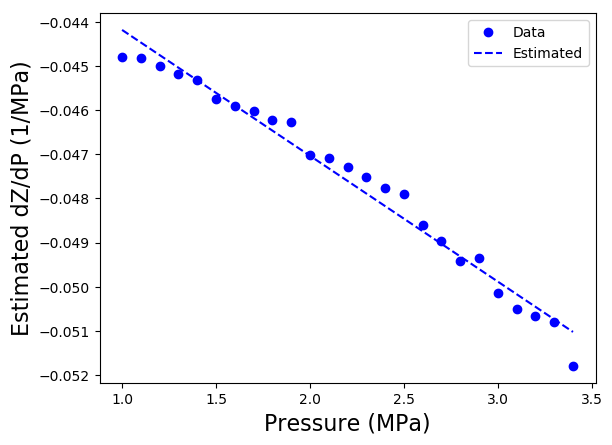

In [55]:
# includes -
using PyPlot
using DataFrames
using CSV

# load my code -
include("./code/Compressibility.jl")

# load the data -
cyclohexane_data_table = CSV.read("Cyclohexane-NIST-664K.txt",delim='\t');

# calc the compressibility, and its derivative -
(Z_array,P_array) = calculateCompressibility(cyclohexane_data_table)
dZdP_array = calculate_derivative(Z_array,P_array)

# plot the derivative vs pressure -
plot(P_array[1:25],dZdP_array[1:25],"bo",label="Data")

# solve for the slope and y-intercept -
number_of_steps = 25
bV = dZdP_array[1:number_of_steps]
X = [P_array[1:number_of_steps] ones(number_of_steps)]
theta = inv(transpose(X)*X)*transpose(X)*bV

# plot the estimate line through the data -
line_estimate = theta[1]*P_array[1:number_of_steps].+theta[2]
plot(P_array[1:number_of_steps],line_estimate,"b--",label="Estimated");

# estimate the B and C -
BP = theta[2];
CP = 0.5*theta[1];

# label -
xlabel("Pressure (MPa)",fontsize=16);
ylabel("Estimated dZ/dP (1/MPa)",fontsize=16);
legend(loc="upper right");

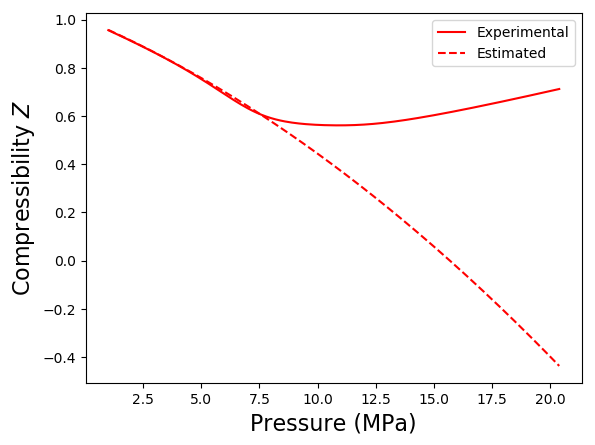

In [48]:
# compare the viral expansion to data Z -
ZModel = 1.0.+BP*P_array.+CP*(P_array.^2)
ZReal = Z_array
PReal = P_array

# plot -
plot(PReal,ZReal,"r",label="Experimental")
plot(PReal,ZModel,"r--",label="Estimated")

# label the axis -
xlabel("Pressure (MPa)",fontsize=16);
ylabel(L"Compressibility $Z$",fontsize=16);
legend(loc="upper right");

#### Hmmm. What happened (looks like we start to deviate around 4 MPa)?

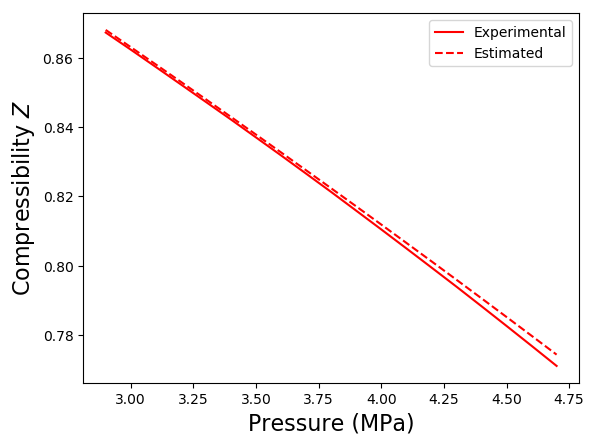

In [53]:
# plot -
range_index = 20:40
plot(PReal[range_index],ZReal[range_index],"r",label="Experimental")
plot(PReal[range_index],ZModel[range_index],"r--",label="Estimated")

# label the axis -
xlabel("Pressure (MPa)",fontsize=16);
ylabel(L"Compressibility $Z$",fontsize=16);
legend(loc="upper right");

In [54]:
cyclohexane_data_table[range_index,:]

,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
1,664.8,2.9,0.60487,1.6532,82.299,87.093,171.37,238.86,255.96,228.9,4.2767,undefined,undefined,vapor
2,664.8,3.0,0.62933,1.589,82.216,86.983,170.96,238.97,256.54,227.67,4.3081,undefined,undefined,vapor
3,664.8,3.1,0.6541,1.5288,82.133,86.872,170.55,239.08,257.14,226.43,4.3403,undefined,undefined,vapor
4,664.8,3.2,0.67919,1.4723,82.049,86.76,170.16,239.2,257.76,225.17,4.3732,undefined,undefined,vapor
5,664.8,3.3,0.70461,1.4192,81.963,86.647,169.77,239.31,258.41,223.9,4.4069,undefined,undefined,vapor
6,664.8,3.4,0.73038,1.3692,81.877,86.532,169.39,239.43,259.07,222.61,4.4414,undefined,undefined,vapor
7,664.8,3.5,0.7565,1.3219,81.79,86.417,169.01,239.55,259.75,221.31,4.4767,undefined,undefined,vapor
8,664.8,3.6,0.78299,1.2772,81.702,86.3,168.64,239.67,260.46,219.99,4.5129,undefined,undefined,vapor
9,664.8,3.7,0.80987,1.2348,81.613,86.182,168.28,239.79,261.19,218.66,4.5499,undefined,undefined,vapor
10,664.8,3.8,0.83713,1.1946,81.523,86.062,167.91,239.92,261.95,217.31,4.5877,undefined,undefined,vapor
